### Round 1: Aptitude
#### Graph-based question: Shortest path using Dijkstra's algorithm in Python.

In [3]:
import heapq
def dijkstra(graph,start):
    distances = {node:float("inf") for node in graph}
    distances[start] = 0
    queue = [(0,start)]
    while queue:
        current_distance,current_node = heapq.heappop(queue)
        if current_distance > distances[current_node]:
            continue
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))
    
    return distances

In [4]:
graph = {
    'A': {'B': 3, 'C': 1},
    'B': {'A': 3, 'C': 7, 'D': 5},
    'C': {'A': 1, 'B': 7, 'D': 2},
    'D': {'B': 5, 'C': 2}
}
start_node = "A"
shortest_distances = dijkstra(graph,start_node)
print(shortest_distances)

{'A': 0, 'B': 3, 'C': 1, 'D': 3}


### Programming-based question: Binary search algorithm in Python.

In [5]:
def binary_search(arr,target):
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1
arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
target = 7
print("Index of", target, ":", binary_search(arr, target))

Index of 7 : 6


In [8]:
arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
target = 7
id = arr.index(7)
print(f"Index of target {target}: {id}")

Index of target 7: 6


### Logical question: Check if A > C given A > B and B > C.

In [10]:
A = 5
B = 3
C = 1
is_A_greater_then_C = A > C
print("Is A greater then C?:",is_A_greater_then_C)

Is A greater then C?: True


In [11]:
distance = 120  # miles
speed = 60      # miles per hour
time = distance/speed
print("Time to travel 120 miles at 60 mph:", time, "hours")

Time to travel 120 miles at 60 mph: 2.0 hours


### Round 2: Live Coding Round
#### Python programming: Reverse a string.

In [12]:
def reverse_string(string):
    return string[::-1]
original_string = "hellow"
reverse_string = reverse_string(original_string)
print("Original String:",original_string)
print("Reverse String:",reverse_string)

Original String: hellow
Reverse String: wolleh


### Python programming: Check if a number is prime.

In [13]:
def is_prime(num):
    if num <= 1:
        return False
    for i in range(2,int(num**0.5)+1):
        if num%i==0:
            return False
    return True
number = 17
if is_prime(number):
    print(number,"is Prime")
else:
    print(number,"is not Prime")

17 is Prime


In [15]:
int(17**0.5+1)

5

In [17]:
17%5==0

False

### SQL: Query to find total sales for each product category.

In [18]:
"""
SELECT PRODUCT_CATEGORY,SUM(SALES_AMOUNT) AS TOTAL_SALES
FROM SALES_TABLE
GROUPBY PRODUCT_CATEGORY
"""

'\nSELECT PRODUCT_CATEGORY,SUM(SALES_AMOUNT) AS TOTAL_SALES\nFROM SALES_TABLE\nGROUPBY PRODUCT_CATEGORY\n'

### Pandas dataframe: Calculate average grade for each subject.

In [19]:
import pandas as pd
data = {"Student":["Alice","Bob","Charlie"],
       "Math":[90,85,95],
        "Science":[88,92,85],
        "History":[78,80,85]}
df = pd.DataFrame(data)
df.head()

,Student,Math,Science,History
0,Alice,90,88,78
1,Bob,85,92,80
2,Charlie,95,85,85


In [22]:
average = sum(df["Math"])/len(df["Math"])
print(int(average))

90


In [25]:
numeric_df = df.drop(columns=["Student"])
average = numeric_df.mean(axis=0)
print("Average grade for each subject:",average.head())

Average grade for each subject: Math       90.000000
Science    88.333333
History    81.000000
dtype: float64


### Round 3: Live Case Study Round


In [26]:
import pandas as pd
data = {
    'CustomerID': [1, 2, 1, 3, 2],
    'ProductID': [101, 102, 103, 104, 101],
    'Category': ['Electronics', 'Clothing', 'Electronics', 'Books', 'Electronics'],
    'Quantity': [1, 2, 1, 3, 1],
    'Price': [500, 50, 600, 20, 400],
    'Timestamp': ['2024-02-01', '2024-02-01', '2024-02-02', '2024-02-02', '2024-02-03']
}
df = pd.DataFrame(data)
df.head()

,CustomerID,ProductID,Category,Quantity,Price,Timestamp
0,1,101,Electronics,1,500,2024-02-01
1,2,102,Clothing,2,50,2024-02-01
2,1,103,Electronics,1,600,2024-02-02
3,3,104,Books,3,20,2024-02-02
4,2,101,Electronics,1,400,2024-02-03


#### What is the total revenue for the month of February?

In [28]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
print(df.head())
fabruary_revanue = df[df["Timestamp"].dt.month == 2]["Price"].sum()
print("Total revenue for February:",fabruary_revanue)

   CustomerID  ProductID     Category  Quantity  Price  Timestamp
0           1        101  Electronics         1    500 2024-02-01
1           2        102     Clothing         2     50 2024-02-01
2           1        103  Electronics         1    600 2024-02-02
3           3        104        Books         3     20 2024-02-02
4           2        101  Electronics         1    400 2024-02-03
Total revenue for February: 1570


#### Which product category has the highest sales volume?

In [30]:
sales_by_category = df.groupby("Category")["Quantity"].sum()
sales_by_category
highest_sales_category = sales_by_category.idxmax()
print("Product category with the highest sales volume:", highest_sales_category)


Product category with the highest sales volume: Books


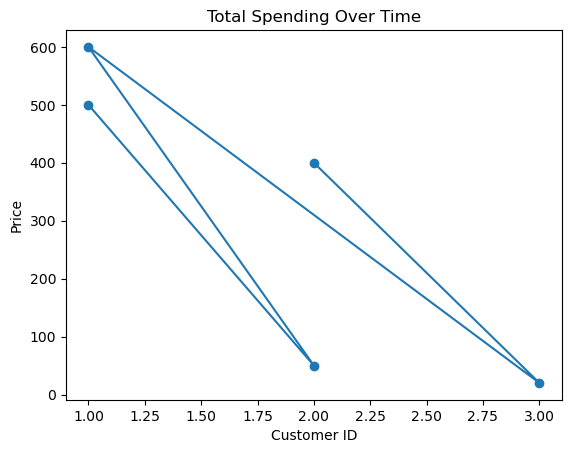

In [32]:
import matplotlib.pyplot as plt
plt.plot(df['CustomerID'], df['Price'], marker='o')
plt.xlabel('Customer ID')
plt.ylabel('Price')
plt.title('Total Spending Over Time')
plt.show()


#### Total Revenue by Category: Write an SQL query to calculate the total revenue generated by each product category.

In [33]:
"""
SELECT CATEGORY,SUM(PRICE * QUANTITY) AS TOTALREVENUE
FROM SALES
GROUP BY CATEGORY
"""

'\nSELECT CATEGORY,SUM(PRICE * QUANTITY) AS TOTALREVENUE\nFROM SALES\nGROUP BY CATEGORY\n'

#### Most Popular Product: Write an SQL query to find the product that has been purchased the most.

In [34]:
"""
SELECT PRODUCTID,COUNT(*) AS PURCHESCOUNT
FROM SALES
GROUP BY PRODUCTID
ORDER BY PURCHESID DESC
LIMIT 1
"""

'\nSELECT PRODUCTID,COUNT(*) AS PURCHESCOUNT\nFROM SALES\nGROUP BY PRODUCTID\nORDER BY PURCHESID DESC\nLIMIT 1\n'

#### Average Price per Product: Write an SQL query to calculate the average price for each product.

In [35]:
"""
SELECT PRODUCTID,AVG(PRICE) AS AVERAGEPRICE
FROM SALES
GROUP BY PRODUCTID
"""

'\nSELECT PRODUCTID,AVG(PRICE) AS AVERAGEPRICE\nFROM SALES\nGROUP BY PRODUCTID\n'

#### Daily Sales Trends: Write an SQL query to analyze the daily sales trends.

In [36]:
"""
SELECT TIMESTAMP,SUM(PRICE * QUANTITY) AS DAILYSALES
FROM SALES
GROUP BY TIMESTAMP
ORDER BY TIMESTAMP
"""

'\nSELECT TIMESTAMP,SUM(PRICE * QUANTITY) AS DAILYSALES\nFROM SALES\nGROUP BY TIMESTAMP\nORDER BY TIMESTAMP\n'

#### Customers with High Spending: Write an SQL query to identify customers who have spent more than a certain threshold amount.

In [37]:
"""
SELECT CustomerID, SUM(Price * Quantity) AS TotalSpending
FROM YourTableName
GROUP BY CustomerID
HAVING TotalSpending > YourThreshold;
"""

'\nSELECT CustomerID, SUM(Price * Quantity) AS TotalSpending\nFROM YourTableName\nGROUP BY CustomerID\nHAVING TotalSpending > YourThreshold;\n'